In [5]:
import torch
import matplotlib.pyplot as plt
from model import GroupedHead

In [6]:
# --- Config (change these!) ---
D_MODEL = 128
VOCAB_SIZE = 5003
K = 2
BALANCE_TOLERANCE = 5  # <-- try 5, 10, 20, 50

In [7]:
head = GroupedHead(d_model=D_MODEL, vocab_size=VOCAB_SIZE, k=K, balance_tolerance=BALANCE_TOLERANCE)
head.build_clusters()

sizes = head.cluster_sizes.cpu().numpy()
target = VOCAB_SIZE // head.n_clusters

print(f"n_clusters={head.n_clusters}, target_size={target}, tolerance=+-{BALANCE_TOLERANCE}")
print(f"min={sizes.min()}, max={sizes.max()}, mean={sizes.mean():.1f}, std={sizes.std():.1f}")

n_clusters=101, target_size=49, tolerance=+-5
min=27, max=54, mean=49.5, std=6.5


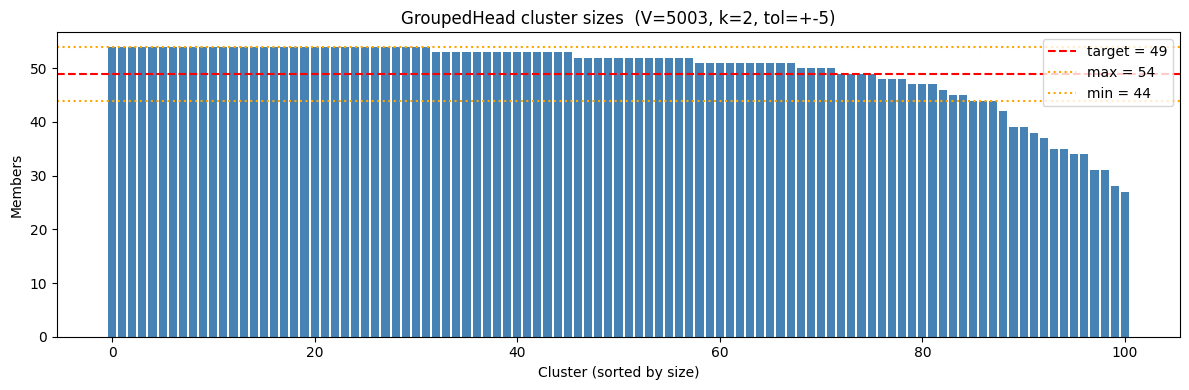

In [8]:
fig, ax = plt.subplots(figsize=(max(12, len(sizes) * 0.06), 4))
ax.bar(range(len(sizes)), sorted(sizes, reverse=True), color="steelblue", edgecolor="none")
ax.axhline(target, color="red", linestyle="--", label=f"target = {target}")
ax.axhline(target + BALANCE_TOLERANCE, color="orange", linestyle=":", label=f"max = {target + BALANCE_TOLERANCE}")
ax.axhline(max(0, target - BALANCE_TOLERANCE), color="orange", linestyle=":", label=f"min = {max(0, target - BALANCE_TOLERANCE)}")
ax.set_xlabel("Cluster (sorted by size)")
ax.set_ylabel("Members")
ax.set_title(f"GroupedHead cluster sizes  (V={VOCAB_SIZE}, k={K}, tol=+-{BALANCE_TOLERANCE})")
ax.legend()
plt.tight_layout()
plt.show()